In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import os
import matplotlib.pyplot as plt
from skimage.feature import hog
import cv2
from runtime_notif import send_email #TODO remove

In [38]:
def HOG_features(img):

    features = hog(img, orientations=9, pixels_per_cell=(8, 8),
    cells_per_block=(2, 2), visualize=False)

    return features

In [39]:
calc_path = r"D:\VSC Workspace\breast_cancer_CNN\dataset\calcification"
mass_path = r"D:\VSC Workspace\breast_cancer_CNN\dataset\mass"

DIM = 128
def load_and_extract_features(directory, DIM):

    X = []
    y = []

    for label in os.listdir(directory):

        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):

            image_path = os.path.join(label_dir, filename)

            img = cv2.imread(image_path)
            img_resized = cv2.resize(img, (DIM, DIM))
            img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
            hog_features = HOG_features(img_gray)
            
            X.append(hog_features)
            y.append(label)
            
    return X, y

In [40]:
calc_train_X, calc_train_y = load_and_extract_features(calc_path + r"\train\cropped_files", DIM)
calc_test_X, calc_test_y = load_and_extract_features(calc_path + r"\test\cropped_files", DIM)

mass_train_X, mass_train_y = load_and_extract_features(mass_path + r"\train\cropped_files", DIM)
mass_test_X, mass_test_y = load_and_extract_features(mass_path + r"\test\cropped_files", DIM)

<b><font size = 5>Testing for Optimal n_estimators:</b></font>

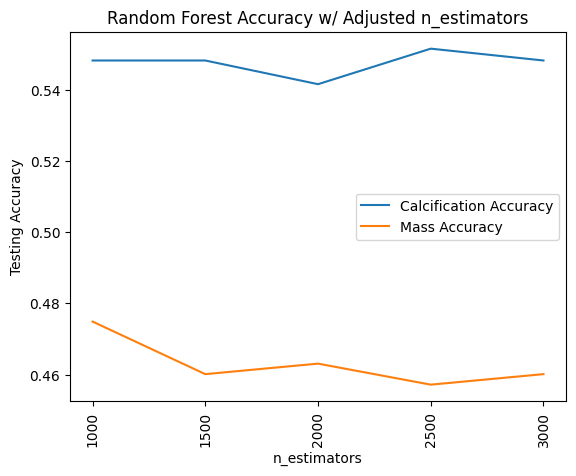

In [42]:
n_estimators = [x for x in range(1000, 3500, 500)]
calc_accuracies = []
mass_accuracies = []

for x in n_estimators:

    calc_classifier = RandomForestClassifier(n_estimators = x, criterion='gini', max_depth=5)
    calc_classifier.fit(calc_train_X, calc_train_y)
    calc_predictions = calc_classifier.predict(calc_test_X)
    calc_accuracies.append(accuracy_score(calc_test_y, calc_predictions))


    mass_classifier = RandomForestClassifier(n_estimators = x, criterion='gini', max_depth=5)
    mass_classifier.fit(mass_train_X, mass_train_y)
    mass_predictions = calc_classifier.predict(mass_test_X)
    mass_accuracies.append(accuracy_score(mass_test_y, mass_predictions))

plt.plot(n_estimators, calc_accuracies)
plt.plot(n_estimators, mass_accuracies)
plt.legend(['Calcification Accuracy', 'Mass Accuracy'])
plt.xlabel("n_estimators")
plt.ylabel("Testing Accuracy")
plt.title("Random Forest Accuracy w/ Adjusted n_estimators")
plt.xticks(n_estimators, rotation = 90)
plt.show()

In [43]:
top_calc_accuracies = sorted(zip(calc_accuracies, n_estimators), reverse = True)
opt_nneighbors_calc = top_calc_accuracies[0][1]
print(f"Optimal n_estimators for Calcification Model: {opt_nneighbors_calc}")

top_mass_accuracies = sorted(zip(mass_accuracies, n_estimators), reverse = True)
opt_nneighbors_mass = top_mass_accuracies[0][1]
print(f"Optimal n_estimators for Mass Model: {opt_nneighbors_mass}")

Optimal n_estimators for Calcification Model: 2500
Optimal n_estimators for Mass Model: 1000


In [44]:
calc_classifier = RandomForestClassifier(n_estimators = opt_nneighbors_calc, criterion='gini', max_depth=5)
calc_classifier.fit(calc_train_X, calc_train_y)

mass_classifier = RandomForestClassifier(n_estimators = opt_nneighbors_mass, criterion='gini', max_depth=5)
mass_classifier.fit(mass_train_X, mass_train_y)

RandomForestClassifier(max_depth=5, n_estimators=1000)

In [45]:
calc_predictions = calc_classifier.predict(calc_test_X)

mass_predictions = calc_classifier.predict(mass_test_X)

<b><font size = 5>Results:</b></font>

In [49]:
print(f"Calcification Random Forest Model Accuracy: {accuracy_score(calc_test_y, calc_predictions)} \n")
print(classification_report(calc_test_y, calc_predictions))

Calcification Random Forest Model Accuracy: 0.5514950166112956 

                         precision    recall  f1-score   support

                 BENIGN       0.46      0.79      0.58       117
BENIGN_WITHOUT_CALLBACK       0.85      0.49      0.62        67
              MALIGNANT       0.64      0.35      0.45       117

               accuracy                           0.55       301
              macro avg       0.65      0.54      0.55       301
           weighted avg       0.62      0.55      0.54       301



In [50]:
print(f"Mass Random Forest Model Accuracy: {accuracy_score(mass_test_y, mass_predictions)} \n")
print(classification_report(mass_test_y, mass_predictions))

Mass Random Forest Model Accuracy: 0.46607669616519176 

                         precision    recall  f1-score   support

                 BENIGN       0.50      0.78      0.61       165
BENIGN_WITHOUT_CALLBACK       0.00      0.00      0.00        37
              MALIGNANT       0.38      0.22      0.28       137

               accuracy                           0.47       339
              macro avg       0.30      0.33      0.30       339
           weighted avg       0.40      0.47      0.41       339

